<a href="https://colab.research.google.com/github/tiffanyndanu/Hypothesis-Testing/blob/main/Python_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# READING THE DATA.

In [27]:
# Importing Pandas
# 
import pandas as pd

In [28]:
#Importing Numpy
#
import numpy as np

In [29]:
# Importing Seaborn
#
import seaborn as sns

In [30]:
# Importing Matplotlib
#
import matplotlib.pyplot as plt

In [31]:
#Loading the Data from the source i.e. csv
# Dataset url = http://bit.ly/DSCoreAutolibDataset
#
Autolib = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
Autolib

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


# CHECKING THE DATASET.

In [32]:
#Description of our dataset.

description=pd.read_excel('/content/columns_explanation (1).xlsx')
description


,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


# CLEANING THE DATASET. 

In [33]:
# Dropping columns we will not need for this analysis
# 
Autolib0 = Autolib.drop(['Utilib_taken_sum',	'Utilib_returned_sum',	'Utilib_14_taken_sum',	'Utilib_14_returned_sum',	'Slots_freed_sum',	'Slots_taken_sum'], axis = 1)
Autolib0.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


In [34]:
# Checking for missing values

Autolib0.isnull().sum()
Autolib0

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117
...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10
16081,95880,6/16/2018,1440,5,weekend,19,19
16082,95880,6/17/2018,1440,6,weekend,33,35
16083,95880,6/18/2018,1440,0,weekday,11,14


In [35]:
# Checking our cleaned dataframe
Autolib0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Postal code            16085 non-null  int64 
 1   date                   16085 non-null  object
 2   n_daily_data_points    16085 non-null  int64 
 3   dayOfWeek              16085 non-null  int64 
 4   day_type               16085 non-null  object
 5   BlueCars_taken_sum     16085 non-null  int64 
 6   BlueCars_returned_sum  16085 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 879.8+ KB


# SAMPLING TECHNIQUE.

In [36]:
# creating  a dataframe thas only weekends.
auto=Autolib0[Autolib0.day_type  == 'weekend']
auto.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
5,75001,1/6/2018,1437,5,weekend,187,185
6,75001,1/7/2018,1440,6,weekend,180,180
12,75001,1/13/2018,1440,5,weekend,224,223
13,75001,1/14/2018,1440,6,weekend,193,193
19,75001,1/20/2018,1439,5,weekend,217,217


In [37]:
# Checking the new dataframe

auto.shape

(4541, 7)

In [38]:
# Random sampling of 1000 rows from the whole dataframe
autolib_sample=auto.sample(n = 1000, replace="False")

autolib_sample.head()


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
12205,93440,1/14/2018,1440,6,weekend,1,3
10834,93200,5/6/2018,1439,6,weekend,29,27
10857,93200,6/9/2018,1440,5,weekend,36,38
1200,75008,4/22/2018,1440,6,weekend,396,376
7213,92290,2/10/2018,1440,5,weekend,16,18


# UNIVARIATE ANALYSIS

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fe52e06b8c0> (for post_execute):


KeyboardInterrupt: ignored

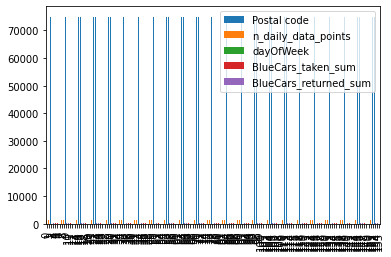

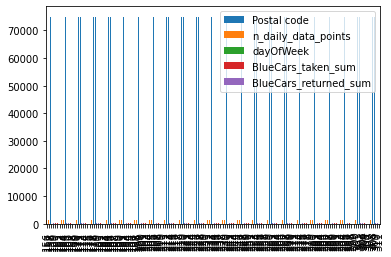

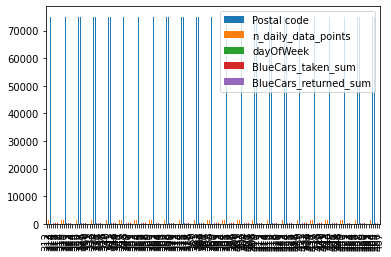

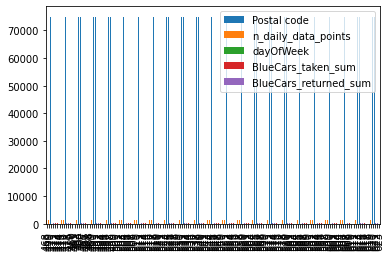

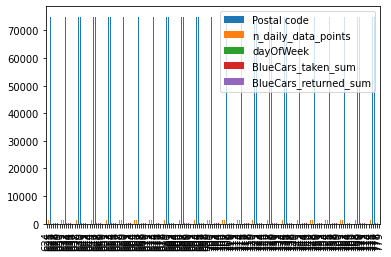

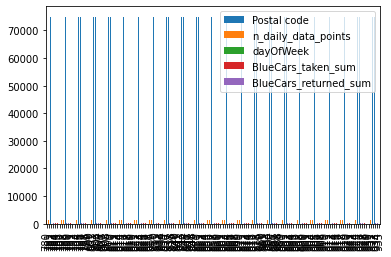

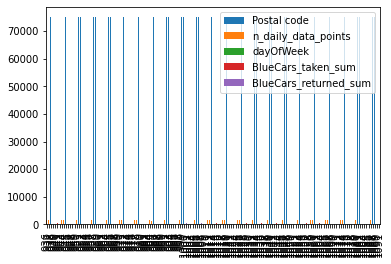

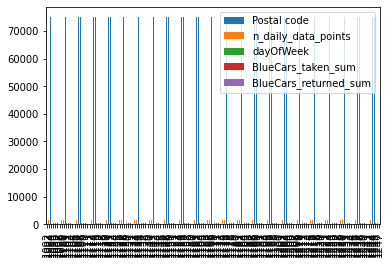

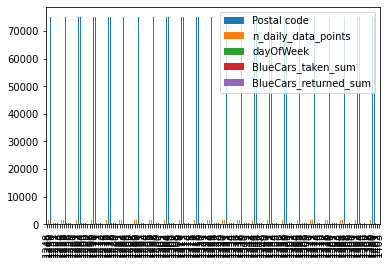

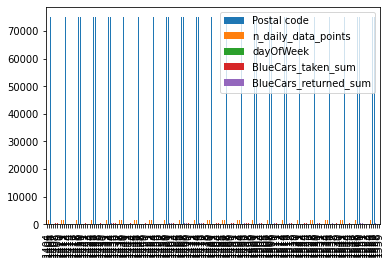

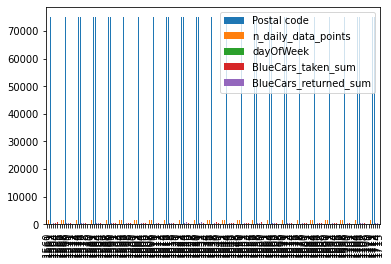

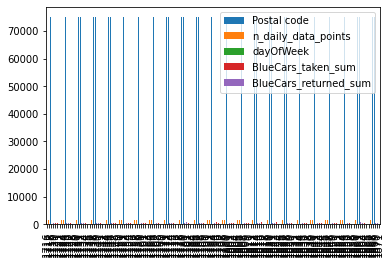

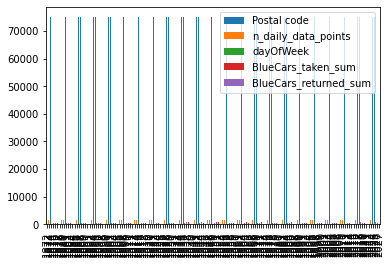

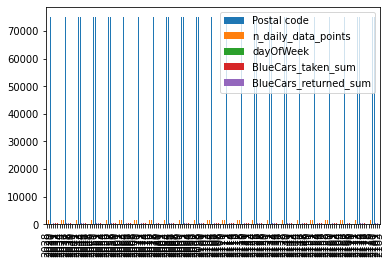

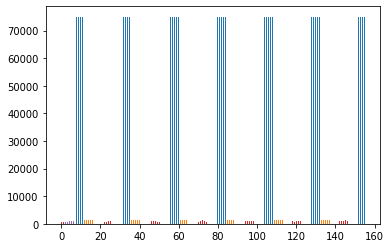

In [39]:
# Plotting a bar graph

Autolib0.groupby('Postal code').plot(kind='bar')
plt.title('Bar graph of day_type:weekday vs weekend')
plt.show()

#The blue cars were taken mostly on the weekdays

# BIVARIATE ANALYSIS.

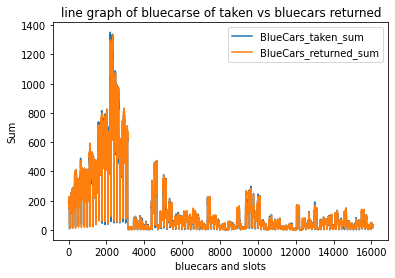

In [40]:

auto[['BlueCars_taken_sum','BlueCars_returned_sum']].plot()
plt.title('line graph of bluecarse of taken vs bluecars returned')
plt.xlabel('bluecars and slots')
plt.ylabel('Sum')
plt.show()


Text(0, 0.5, 'bluecars returned sum')

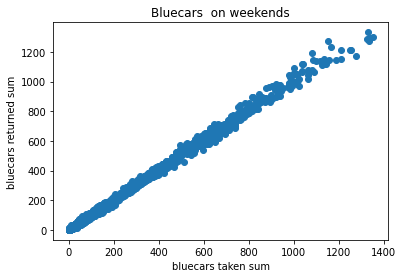

In [41]:
# create a figure and axis
fig, ax = plt.subplots()
colors={'BlueCars_taken_sum':'r','BlueCars_returned_sum':'b'}

# scatter the bluecars taken  against the blucars returned
ax.scatter(auto['BlueCars_taken_sum'], auto['BlueCars_returned_sum'])


ax.set_title('Bluecars  on weekends')
ax.set_xlabel('bluecars taken sum')
ax.set_ylabel('bluecars returned sum')
# both bluecars taken and those returned they appear to have linear regression 
# Reason is beacuse the rate at which  bluecars were taken is almost  the same rate bluecars were  returned.


# HYPOTHESIS TESTING.

In [42]:
#Checking for the mean of bluecars in our sample
mean=auto['BlueCars_taken_sum'].mean()
mean


151.09006826690157

In [44]:
#Checking for the standard deviation of the sample
std=auto['BlueCars_taken_sum'].std()
std

218.5656415891513

In [45]:
# Calculating the Z value
signal=(125.92695-mean)
#√1000=31.62277660
noise=(std/31.62277660)
z_score=(signal/noise)
z_score
#Since the Z score value is negative, it means that my distribution curve  is LEFT TAIL.

-3.6406804918102185

In [46]:
from scipy import stats
from scipy.stats import norm
p_value = 1 - stats.norm.cdf(z_score)
p_value
# After calculation of p value which is given as 1-significance level(0.05),
# The result is 0.999864



0.9998640407960675